In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Laptops price dataset from Kaggle
df = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv")

In [3]:
# normalize the names of the columns
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [4]:
df

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99


In [5]:
df = df[['ram', 'storage', 'screen', 'final_price']]

In [6]:
df.describe()

,ram,storage,screen,final_price
count,2160.000000,2160.000000,2156.000000,2160.000000
mean,15.413889,596.294444,15.168112,1312.638509
std,9.867815,361.220506,1.203329,911.475417
min,4.000000,0.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,661.082500
50%,16.000000,512.000000,15.600000,1031.945000
75%,16.000000,1000.000000,15.600000,1708.970000
max,128.000000,4000.000000,18.000000,7150.470000


<Axes: xlabel='final_price', ylabel='Count'>

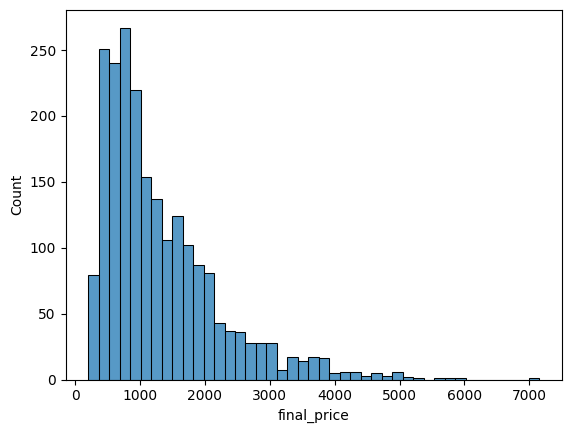

In [7]:
sns.histplot(df.final_price)

<Axes: xlabel='final_price', ylabel='Count'>

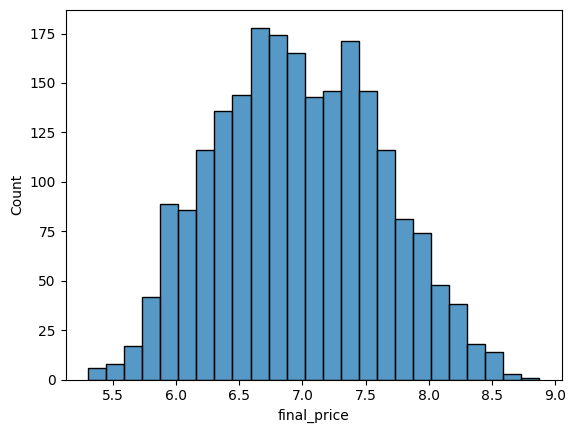

In [8]:
sns.histplot(np.log(df.final_price))

In [9]:
# q1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ram          2160 non-null   int64  
 1   storage      2160 non-null   int64  
 2   screen       2156 non-null   float64
 3   final_price  2160 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 67.6 KB


In [10]:
# q2
df.ram.median()

np.float64(16.0)

In [11]:
# prepare and split dataset
def split_dataset(df, seed=42, val_size=0.2, test_size=0.2):
    np.random.seed(seed)

    n = len(df)

    n_val = int(val_size * n)
    n_test = int(test_size * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    y_train = df_train.final_price.values
    y_val = df_val.final_price.values
    y_test = df_test.final_price.values
    
    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']

    return df_train, df_val, df_test, y_train, y_val, y_test

df_train, df_val, df_test, y_train, y_val, y_test = split_dataset(df)

In [12]:
y_train_log = np.log(y_train)
y_val_log = np.log(y_val)
y_test_log = np.log(y_test)

In [13]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

COLS = ['ram', 'storage', 'screen']

def prepare_X(df, fill_value: int | float | dict | pd.Series = 0):
    return df[COLS].fillna(fill_value).values

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [19]:
# q3: try with fill value = 0 
fill_value = 0

X_train = prepare_X(df_train, fill_value)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print(f"train: {rmse(y_train, y_pred):.2f}")

X_val = prepare_X(df_val, fill_value)

y_pred = w_0 + X_val.dot(w)
print(f"validation: {rmse(y_val, y_pred):.2f}")

train: 602.39
validation: 597.36


In [20]:
# q3: try with fill value = mean 
fill_value = df_train.mean()

X_train = prepare_X(df_train, fill_value)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print(f"train: {rmse(y_train, y_pred):.2f}")

X_val = prepare_X(df_val, fill_value)

y_pred = w_0 + X_val.dot(w)
print(f"validation: {rmse(y_val, y_pred):.2f}")

train: 602.18
validation: 600.27


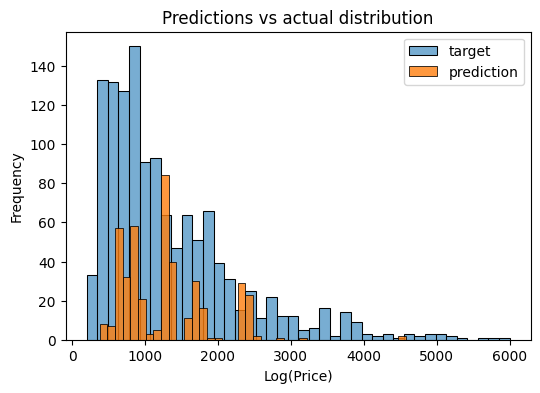

In [21]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price)')
plt.title('Predictions vs actual distribution')

plt.show()

In [22]:
# q3: try with fill value = 0 

fill_value = 0

X_train = prepare_X(df_train, fill_value)
w_0, w = train_linear_regression(X_train, y_train_log)

y_pred = w_0 + X_train.dot(w)
print(f"train: {rmse(y_train_log, y_pred):.2f}")

X_val = prepare_X(df_val, fill_value)
y_pred = w_0 + X_val.dot(w)
print(f"validation: {rmse(y_val_log, y_pred):.2f}")


train: 0.45
validation: 0.43


In [23]:
# q3: try with fill value = mean 
fill_value = df_train.mean()

X_train = prepare_X(df_train, fill_value)
w_0, w = train_linear_regression(X_train, y_train_log)

y_pred = w_0 + X_train.dot(w)
print(f"train: {rmse(y_train_log, y_pred):.2f}")

X_val = prepare_X(df_val, fill_value)

y_pred = w_0 + X_val.dot(w)
print(f"validation: {rmse(y_val_log, y_pred):.2f}")

train: 0.45
validation: 0.43


In [27]:
def train_linear_regression_reg(X, y, r=0.0):
    """Train "regularized" linear regression model."""
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [28]:
# q4: regularization
df_train, df_val, df_test, y_train, y_val, y_test = split_dataset(df)

fill_value = 0

X_train = prepare_X(df_train, fill_value)
X_val = prepare_X(df_val, fill_value)

for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)

    y_pred = w_0 + X_val.dot(w)
    print(f"Validation score ({r=}): {rmse(y_val, y_pred):.2f}")

Validation score (r=0): 597.36
Validation score (r=0.01): 597.36
Validation score (r=0.1): 597.35
Validation score (r=1): 597.21
Validation score (r=5): 597.01
Validation score (r=10): 597.06
Validation score (r=100): 597.90


In [30]:
scores = []
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    df_train, df_val, df_test, y_train, y_val, y_test = split_dataset(df, seed=seed)

    X_train = prepare_X(df_train, fill_value=0)
    X_val = prepare_X(df_val, fill_value=0)

    w_0, w = train_linear_regression(X_train, y_train)
    y_pred = w_0 + X_val.dot(w)

    score = rmse(y_val, y_pred)

    print(f"Validation score ({seed=}): {score:.2f}")

    scores.append(score)

Validation score (seed=0): 565.45
Validation score (seed=1): 636.80
Validation score (seed=2): 588.96
Validation score (seed=3): 597.81
Validation score (seed=4): 571.96
Validation score (seed=5): 573.24
Validation score (seed=6): 647.34
Validation score (seed=7): 550.44
Validation score (seed=8): 587.33
Validation score (seed=9): 576.10


In [31]:
# q5
np.std(scores).round(3)

np.float64(29.176)

In [42]:
# q6
df_train, df_val, df_test, y_train, y_val, y_test = split_dataset(df, seed=9)

df_train_val = pd.concat([df_train, df_val])
y_train_val = np.concatenate([y_train, y_val])

X_train_val = prepare_X(df_train_val, fill_value=0)
X_test = prepare_X(df_test, fill_value=0)

w_0, w = train_linear_regression_reg(X_train_val, y_train_val, r=0.001)
y_pred = w_0 + X_test.dot(w)

score = rmse(y_test, y_pred)

print(f"Test score: {score:.2f}")

Test score: 608.61
